# Pneumonia Prediction using Chest X-ray

Libraries Used:

1. `tensorflow`
2. `pillow`
3. `matplotlib`


Model Used: CNN model

# Instruction for Running the Code

Step 1: Download the Data From the Given [Source](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)<br>

Step 2: Open the Notebook and Use Runall.(Since, there is huge number of parameters,there may be high usage of CPU and GPU as a result).<br>

*Note that: I have also used model checkpointing if there is failure in training.*

Input Shape: 150x150x3

Used `ImageDataGenerator` from Tensorflow for creating image to specific sizes i.e. 150x150x3.

# Model 1 Architecture
Architecture:

1. Layer 1 <br>
    1.1 32 Filters with 3x3 Stride taking 150x150x3 input.<br>
    1.2 Batch Normalization. <br>
    1.3 Max pooling with pool size of 2x2.<br>
    
2. Layer 2<br>
   2.1 64 Filters with 3x3 Stride taking data from Layer 1.<br>
   2.2 Batch Normalization. <br>
   2.3 Max pooling with pool size of 2x2.<br>
   
3. Layer 3<br>
    3.1 128 Filters with 3x3 Stride taking data from Layer 2.<br>
    3.2 Batch Normalization. <br>
    3.3 Max Pooling with Pool size of 2x2.<br>

4. Flattening Layers (Takes image and changes to single dimension)

5. Dense Layer 1 with 2048 nodes and dropout of 0.2

6. Dense Layer 2 with 512 nodes and dropout of 0.2

7. Dense Layer 3 with 128 nodes and dropout of 0.2

8. Dense Layer 4 with 32 nodes and dropout of 0.2

9. Final Layer with 1 Sigmoid activation.

All Layers except final layer has `RELU` activation function.

# Model 2 Architecture

Architecture:

1. Layer 1 <br>
    1.1 16 Filters with 3x3 filter size taking 150x150x3 input.<br>
    1.2 Batch Normalization. <br>
    1.3 Max pooling with pool size of 2x2.<br>
    
2. Layer 2<br>
   2.1 32 Filters with 3x3 filter size taking data from Layer 1.<br>
   2.2 Batch Normalization. <br>
   2.3 Max pooling with pool size of 2x2.<br>
   
3. Layer 3<br>
    3.1 64 Filters with 3x3 filter size taking data from Layer 2.<br>
    3.2 Batch Normalization. <br>
    3.3 Max Pooling with Pool size of 2x2.<br>

4. Layer 3<br>
    3.1 128 Filters with 3x3 filter size taking data from Layer 2.<br>
    3.2 Batch Normalization. <br>
    3.3 Max Pooling with Pool size of 2x2.<br>

5. Flattening Layers (Takes image and changes to single dimension)

6. Dense Layer 1 with 2048 nodes and dropout of 0.2

7. Dense Layer 2 with 1024 nodes and dropout of 0.2

8. Dense Layer 3 with 512 nodes and dropout of 0.2

9. Dense Layer 4 with 256 nodes and dropout of 0.2

10. Dense Layer 4 with 128 nodes and dropout of 0.2

11. Dense Layer 4 with 64 nodes and dropout of 0.2

12. Dense Layer 4 with 32 nodes and dropout of 0.2

13. Dense Layer 4 with 16 nodes and dropout of 0.2

14. Final Layer with 1 Sigmoid activation.

All Layers except final layer has `RELU` activation function.


In [1]:
import tensorflow as tf
tf.__version__

'2.9.0'

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import os

dir_name = os.getcwd()
for dirname, _, filenames in os.walk(dir_name+"/chest_xray"):
    for filename in filenames:
        print(filename)

.DS_Store
.DS_Store
person147_bacteria_706.jpeg
person100_bacteria_482.jpeg
person78_bacteria_382.jpeg
person124_bacteria_589.jpeg
person1647_virus_2848.jpeg
person1675_virus_2891.jpeg
person89_bacteria_440.jpeg
person35_virus_80.jpeg
person122_bacteria_582.jpeg
person119_bacteria_565.jpeg
person1662_virus_2875.jpeg
person85_bacteria_422.jpeg
person1669_virus_2884.jpeg
person39_virus_85.jpeg
person36_virus_81.jpeg
person134_bacteria_640.jpeg
person138_bacteria_659.jpeg
person92_bacteria_450.jpeg
person34_virus_76.jpeg
person22_virus_55.jpeg
person120_bacteria_571.jpeg
person110_bacteria_531.jpeg
person23_virus_56.jpeg
person94_bacteria_457.jpeg
person126_bacteria_599.jpeg
person1_virus_13.jpeg
person151_bacteria_718.jpeg
person37_virus_82.jpeg
person109_bacteria_527.jpeg
person117_bacteria_556.jpeg
person86_bacteria_429.jpeg
person100_bacteria_477.jpeg
person82_bacteria_404.jpeg
person108_bacteria_506.jpeg
person81_bacteria_395.jpeg
person161_bacteria_762.jpeg
person139_bacteria_662.jp

In [4]:
def display_images(images, names):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 10))
    for i in range(len(images)):
        new_dir_name,name = names[i]
        img = np.array(Image.open(dir_name+new_dir_name+images[i]))
        axs[i].imshow(img)
        axs[i].set_title(name)
        axs[i].axis('off')
    plt.show()

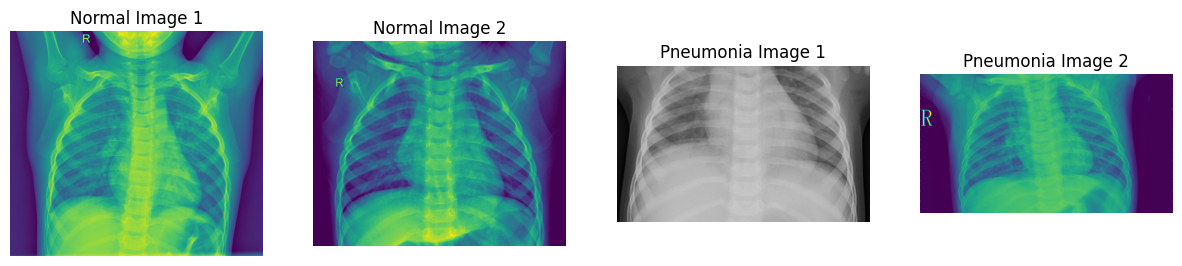

In [5]:
#Displaying the Normal and Pneumonia Images
images_name = ['IM-0115-0001.jpeg','IM-0117-0001.jpeg','person1_bacteria_1.jpeg','person1931_bacteria_4842.jpeg']
names = [('/chest_xray/train/NORMAL/',"Normal Image 1"),('/chest_xray/train/NORMAL/', "Normal Image 2"),
         ('/chest_xray/train/PNEUMONIA/',"Pneumonia Image 1"),('/chest_xray/train/PNEUMONIA/',"Pneumonia Image 2")]
display_images(images_name, names)

In [6]:
train_generator = ImageDataGenerator(rescale = 1./255, 
                                     rotation_range = 7, 
                                     horizontal_flip = True, 
                                     shear_range = 0.2, 
                                     height_shift_range = 0.07, 
                                     zoom_range = 0.2)

test_generator = ImageDataGenerator(rescale = 1./255)

val_generator = ImageDataGenerator(rescale = 1./255)

In [7]:
train_base = train_generator.flow_from_directory(dir_name+'/chest_xray/', target_size = (150, 150),
                                                           batch_size = 32, class_mode = 'binary')

Found 5856 images belonging to 3 classes.


In [8]:
test_base = test_generator.flow_from_directory(dir_name+'/chest_xray/test', target_size = (150, 150), 
                                               batch_size = 32, class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [9]:
val_base = val_generator.flow_from_directory(dir_name+'/chest_xray/val', target_size = (150, 150), 
                                            batch_size = 32, class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [10]:
#Convolutional Neural Network

classification_1 = Sequential()
classification_1.add(Conv2D(32, (3,3), input_shape = (150, 150, 3), activation = 'relu'))
classification_1.add(BatchNormalization())
classification_1.add(MaxPooling2D(pool_size = (2,2)))
classification_1.add(Conv2D(64, (3,3), activation = 'relu'))
classification_1.add(BatchNormalization())
classification_1.add(MaxPooling2D(pool_size = (2,2)))
classification_1.add(Conv2D(128, (3,3), activation = 'relu'))
classification_1.add(BatchNormalization())
classification_1.add(MaxPooling2D(pool_size = (2,2)))
classification_1.add(Flatten())
classification_1.add(Dense(units = 2048, activation = 'relu'))
classification_1.add(Dropout(0.2))
classification_1.add(Dense(units = 512, activation = 'relu'))
classification_1.add(Dropout(0.2))
classification_1.add(Dense(units = 128, activation = 'relu'))
classification_1.add(Dropout(0.2))
classification_1.add(Dense(units = 32, activation = 'relu'))
classification_1.add(Dropout(0.2))
classification_1.add(Dense(units = 1, activation = 'sigmoid'))

Metal device set to: Apple M1 Max


2023-05-07 19:02:19.808816: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-07 19:02:19.809288: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
classification_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                        

In [12]:
#Compiling the model
classification_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.AUC()])

In [13]:
#To save the best performing model during training i.e. one with the highest validation 'auc' score
model_checkpoint_1 = 'best_model_1.h5'
model_checkpoint_callback = ModelCheckpoint(filepath=model_checkpoint_1,
                                            monitor='val_auc',
                                            mode='max',
                                            save_best_only=True)

In [14]:
#Training the model for 10 epoch

history = classification_1.fit(train_base, steps_per_epoch = len(train_base),
                             epochs = 10,
                             callbacks=[model_checkpoint_callback],
                             validation_data = test_base,
                             validation_steps = len(test_base))

Epoch 1/10


2023-05-07 19:02:20.410962: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-07 19:02:20.859503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


183/183 [==============================] - ETA: 0s - loss: 0.6520 - accuracy: 0.8719 - precision: 0.8940 - auc: 0.5115

2023-05-07 19:03:05.889586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


183/183 [==============================] - 49s 261ms/step - loss: 0.6520 - accuracy: 0.8719 - precision: 0.8940 - auc: 0.5115 - val_loss: 0.7216 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_auc: 0.7192
Epoch 2/10
183/183 [==============================] - 45s 244ms/step - loss: 0.3694 - accuracy: 0.8899 - precision: 0.8936 - auc: 0.5099 - val_loss: 0.7665 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_auc: 0.8275
Epoch 3/10
183/183 [==============================] - 45s 243ms/step - loss: 0.3467 - accuracy: 0.8904 - precision: 0.8935 - auc: 0.5685 - val_loss: 0.7140 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_auc: 0.7259
Epoch 4/10
183/183 [==============================] - 44s 242ms/step - loss: 0.3361 - accuracy: 0.8893 - precision: 0.8934 - auc: 0.5837 - val_loss: 0.7217 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_auc: 0.7167
Epoch 5/10
183/183 [==============================] - 45s 244ms/step - loss: 0.3319 - accuracy: 0.8904 - precision: 0.8938 - au

In [15]:
#Loading a saved Keras model from the file- modal_checkpoint_1
model_1 = tf.keras.models.load_model(model_checkpoint_1)

# Class Activation Maps for Model 1


There are 2 different class activation maps:

1.  For Pneumonia Images

2. For normal Images.


It shows that chest area for classification are shown with green shading while getting into different layers.

1/1 [==============================] - 0s 148ms/step


2023-05-07 19:09:56.165690: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


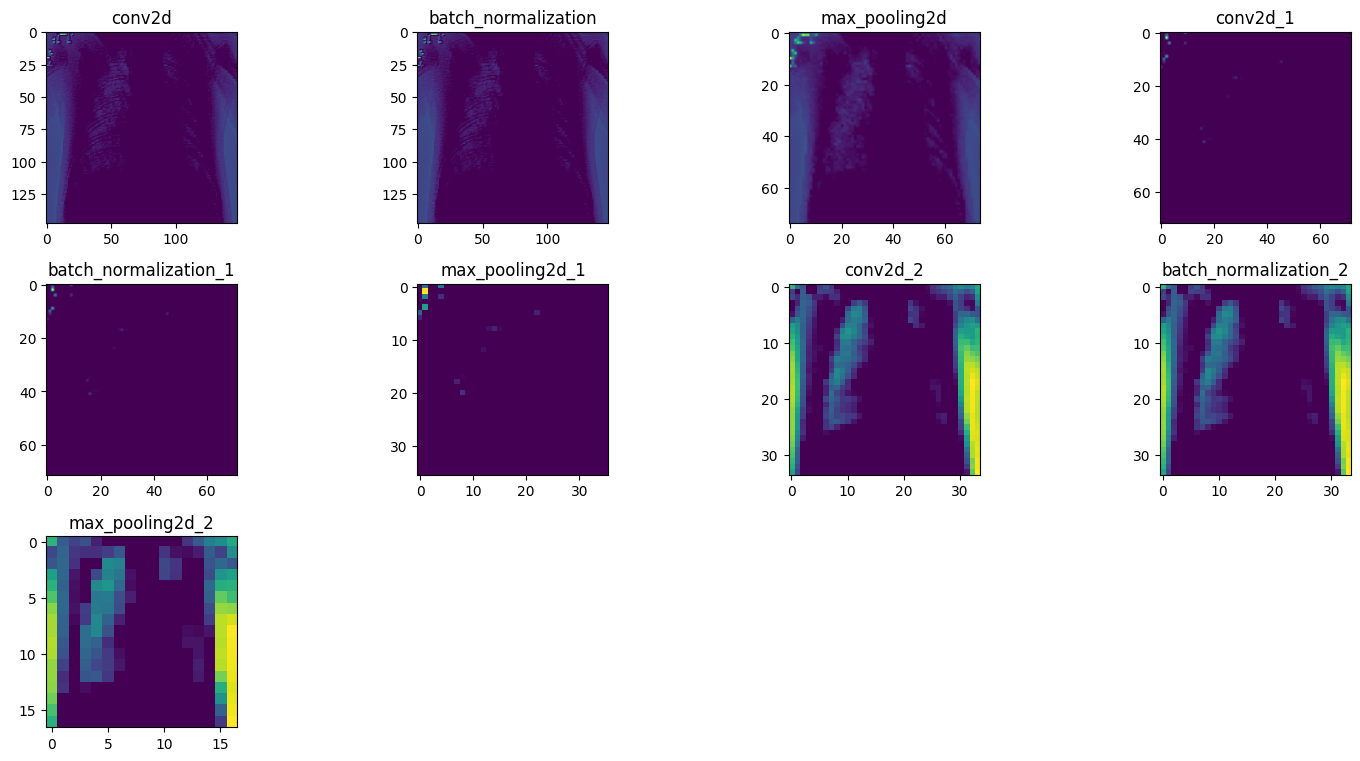

In [16]:
# Creating class activation map
layer_outputs = [layer.output for layer in model_1.layers]
activation_model = tf.keras.models.Model(inputs=model_1.input, outputs=layer_outputs)


img_path = dir_name +"/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150,150))
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.keras.applications.resnet50.preprocess_input(x)
activations = activation_model.predict(x.reshape(1,150,150,3))


import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i, activation in enumerate(activations):
    if i !=9:
        plt.subplot(4,4,i+1)
        plt.title(model_1.layers[i].name)
        plt.imshow(activation[0,:,:,0], cmap='viridis')
    else:
        break
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 45ms/step


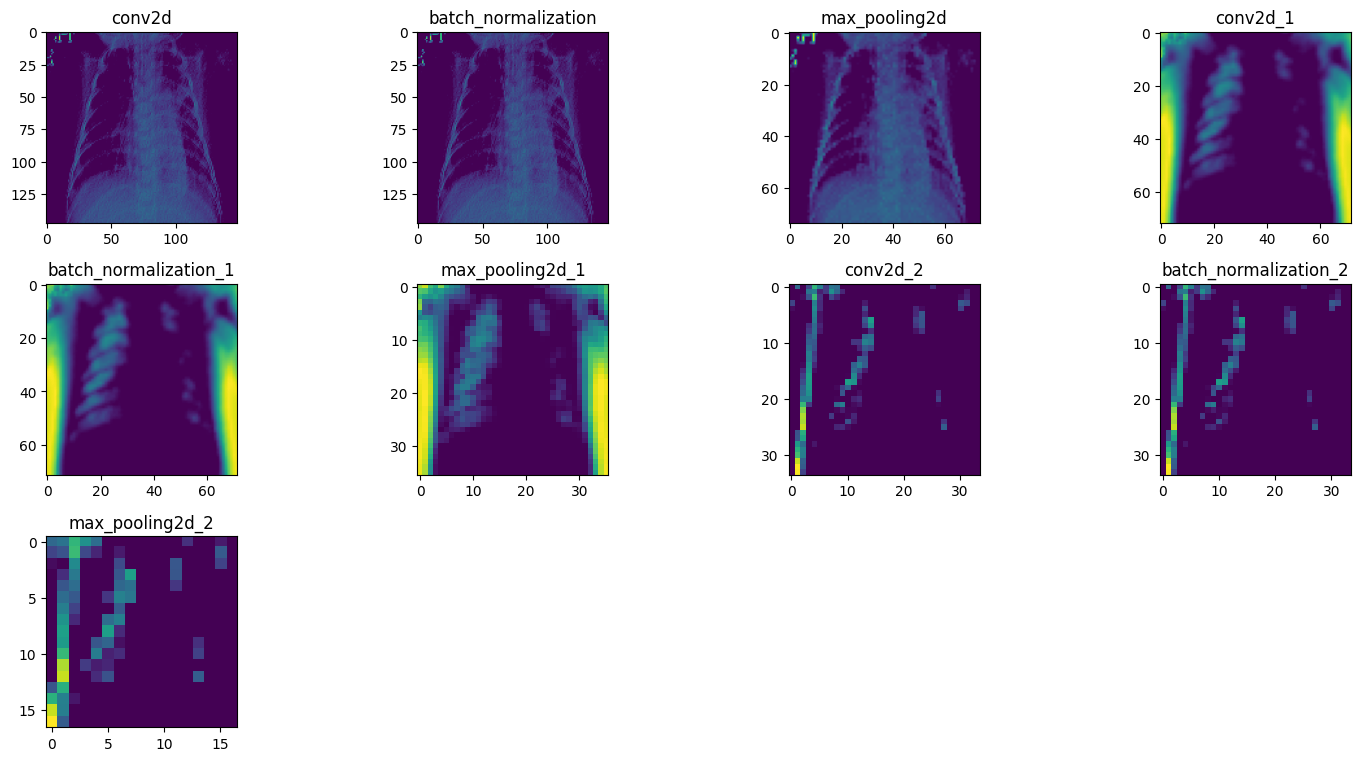

In [30]:
img_path = dir_name +"/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150,150))
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.keras.applications.resnet50.preprocess_input(x)
activations = activation_model.predict(x.reshape(1,150,150,3))


import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i, activation in enumerate(activations):
    if i !=9:
        plt.subplot(4,4,i+1)
        plt.title(model_1.layers[i].name)
        plt.imshow(activation[0,:,:,0], cmap='viridis')
    else:
        break
plt.tight_layout()
plt.show()

# Model 2

In [17]:
#Convolutional Neural Network for Image classification
classification_2 = Sequential()
classification_2.add(Conv2D(16, (3,3), input_shape = (150, 150, 3), activation = 'relu'))
classification_2.add(BatchNormalization())
classification_2.add(MaxPooling2D(pool_size = (2,2)))
classification_2.add(Conv2D(32, (3,3), activation = 'relu'))
classification_2.add(BatchNormalization())
classification_2.add(MaxPooling2D(pool_size = (2,2)))
classification_2.add(Conv2D(64, (3,3), activation = 'relu'))
classification_2.add(BatchNormalization())
classification_2.add(MaxPooling2D(pool_size = (2,2)))
classification_2.add(Conv2D(128, (3,3), activation = 'relu'))
classification_2.add(BatchNormalization())
classification_2.add(MaxPooling2D(pool_size = (2,2)))
classification_2.add(Flatten())
classification_2.add(Dense(units = 2048, activation = 'relu'))
classification_2.add(Dropout(0.2))
classification_2.add(Dense(units = 1024, activation = 'relu'))
classification_2.add(Dropout(0.2))
classification_2.add(Dense(units = 512, activation = 'relu'))
classification_2.add(Dropout(0.2))
classification_2.add(Dense(units = 256, activation = 'relu'))
classification_2.add(Dropout(0.2))
classification_2.add(Dense(units = 128, activation = 'relu'))
classification_2.add(Dropout(0.2))
classification_2.add(Dense(units = 64, activation = 'relu'))
classification_2.add(Dropout(0.2))
classification_2.add(Dense(units = 32, activation = 'relu'))
classification_2.add(Dropout(0.2))
classification_2.add(Dense(units = 16, activation = 'relu'))
classification_2.add(Dropout(0.2))
classification_2.add(Dense(units = 1, activation = 'sigmoid'))

In [18]:
#Compiling the model
classification_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.AUC()])

In [19]:
classification_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 batch_normalization_3 (Batc  (None, 148, 148, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 batch_normalization_4 (Batc  (None, 72, 72, 32)       128       
 hNormalization)                                                 
                                                      

In [20]:
#To save the best performing model during training i.e. one with the highest validation 'auc' score
model_checkpoint_2 = 'best_model_2.h5'
model_checkpoint_callback_2 = ModelCheckpoint(filepath=model_checkpoint_2,
                                            monitor='val_auc',
                                            mode='max',
                                            save_best_only=True)

In [22]:
#Training the model for 10 epoch
history_2 = classification_2.fit(train_base, steps_per_epoch = len(train_base),
                             epochs = 10,
                             callbacks=[model_checkpoint_callback_2],
                             validation_data = test_base,
                             validation_steps = len(test_base))

Epoch 1/10
183/183 [==============================] - ETA: 0s - loss: 0.3742 - accuracy: 0.8820 - precision_1: 0.8943 - auc_1: 0.5684

2023-05-07 19:10:51.926295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


183/183 [==============================] - 45s 243ms/step - loss: 0.3742 - accuracy: 0.8820 - precision_1: 0.8943 - auc_1: 0.5684 - val_loss: 0.7186 - val_accuracy: 0.6250 - val_precision_1: 0.6250 - val_auc_1: 0.7358
Epoch 2/10
183/183 [==============================] - 43s 233ms/step - loss: 0.3624 - accuracy: 0.8902 - precision_1: 0.8934 - auc_1: 0.5637 - val_loss: 0.6663 - val_accuracy: 0.6250 - val_precision_1: 0.6250 - val_auc_1: 0.7579
Epoch 3/10
183/183 [==============================] - 43s 234ms/step - loss: 0.3696 - accuracy: 0.8899 - precision_1: 0.8934 - auc_1: 0.5593 - val_loss: 0.7061 - val_accuracy: 0.6250 - val_precision_1: 0.6250 - val_auc_1: 0.5881
Epoch 4/10
183/183 [==============================] - 42s 231ms/step - loss: 0.3409 - accuracy: 0.8907 - precision_1: 0.8934 - auc_1: 0.6112 - val_loss: 0.7648 - val_accuracy: 0.6250 - val_precision_1: 0.6250 - val_auc_1: 0.5053
Epoch 5/10
183/183 [==============================] - 43s 235ms/step - loss: 0.3388 - accuracy:

# Class Activation Maps for Model 2


There are 2 different class activation maps:

1.  For Pneumonia Images

2. For normal Images.


It shows that chest area for classification are shown with green shading while getting into different layers.

2023-05-07 19:36:19.700957: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 448ms/step


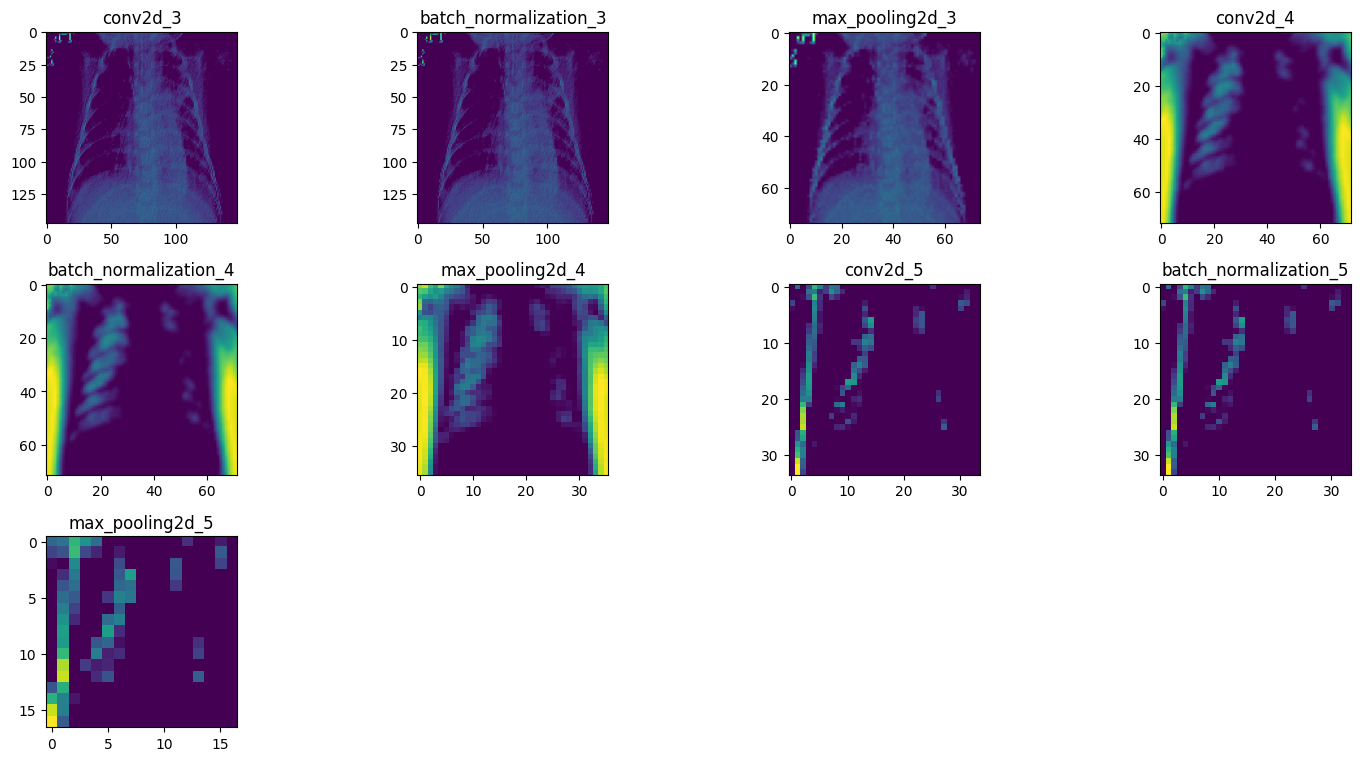

In [27]:
layer_outputs = [layer.output for layer in classification_2.layers]
activation_model = tf.keras.models.Model(inputs=classification_2.input, outputs=layer_outputs)

img_path = dir_name +"/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150,150))
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.keras.applications.resnet50.preprocess_input(x)
activations = activation_model.predict(x.reshape(1,150,150,3))

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i, activation in enumerate(activations):
    if i !=9:
        plt.subplot(4,4,i+1)
        plt.title(classification_2.layers[i].name)
        plt.imshow(activation[0,:,:,0], cmap='viridis')
    else:
        break
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 175ms/step


2023-05-07 19:36:44.184460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


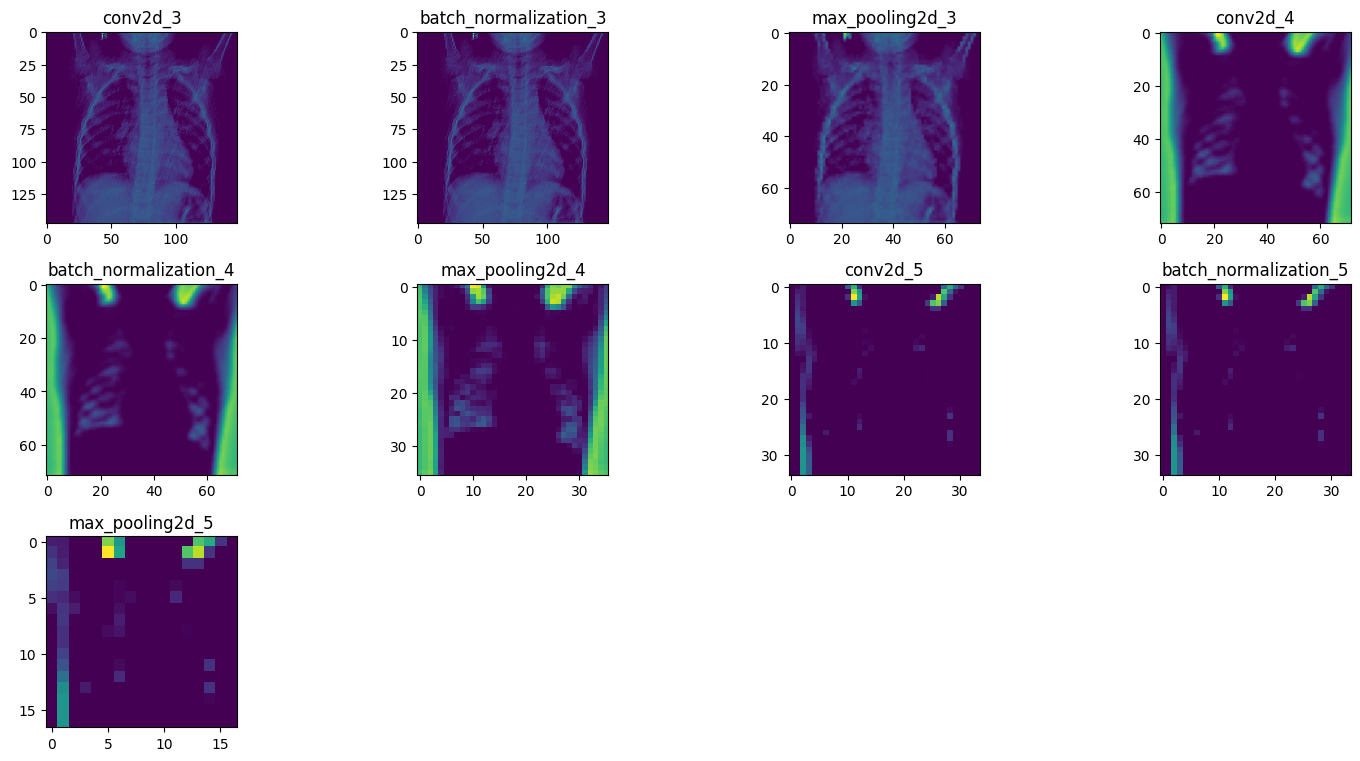

In [29]:
layer_outputs = [layer.output for layer in classification_2.layers]
activation_model = tf.keras.models.Model(inputs=classification_2.input, outputs=layer_outputs)

img_path = dir_name +"/chest_xray/train/NORMAL/IM-0115-0001.jpeg"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150,150))
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.keras.applications.resnet50.preprocess_input(x)
activations = activation_model.predict(x.reshape(1,150,150,3))

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
for i, activation in enumerate(activations):
    if i !=9:
        plt.subplot(4,4,i+1)
        plt.title(classification_2.layers[i].name)
        plt.imshow(activation[0,:,:,0], cmap='viridis')
    else:
        break
plt.tight_layout()
plt.show()